In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,silhouette_score
import os
import time
from tslearn_test_OD_years import TSA64K

In [17]:
# do clustering and print sillouttle score

method = 'euclidean'
dispatch_data = 'Example_dispatch_test.csv'
num_clusters = 40
selected_years = 10

tsa_task = TSA64K(dispatch_data, method,selected_years)
dispatch_array = tsa_task.read_data()
train_data = tsa_task.transform_data(dispatch_array)

sc,labels = tsa_task.cluster_data(train_data, num_clusters,save_index = True)
print(sc)

C:\Users\JKLCh\Desktop\ND_PhD\Research\clustering\tslearn\onlydispatch_test\year_10\40_clusters_OD.json
0.3525348875422436


In [28]:
# store the clustered data into dictionary cluster[label:dispatch_data]

clusters = {}
for i, j in enumerate(labels):
    if j not in clusters:
        clusters[j] = {}
        clusters[j]['dispatch'] = []
        clusters[j]['dispatch'].append(train_data[i])
    else:
        clusters[j]['dispatch'].append(train_data[i])

3640


In [26]:
# read the representative day from json file

cluster_results = str(num_clusters) + '_clusters_OD.json'
path0 = os.getcwd()

# test on 1/10/100/1000 year data
path1 = f'year_{selected_years}'
path = os.path.join(path0,path1,cluster_results)

with open(path, 'r') as f:
    cluster_results = json.load(f)

cen = np.array(cluster_results['model_params']['cluster_centers_'])
time_len = range(24)

In [20]:
def plot_results(num):
    
    font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 18,
    }
    f,ax1 = plt.subplots(figsize = ((16,6)))
    for i in clusters[num]['dispatch']:
#         ax1.boxplot(i)
        ax1.plot(time_len,i,'--',c='g', alpha=0.3)
#     ax1.set_ylim(0,100)
    ax1.plot(time_len,cen[num], '-',c = 'r')
    ax1.set_ylabel('Dispatched Power(MW)',font = font1)
    ax1.set_xlabel('Time(h)',font = font1)
    plt.title('Cluster_'+str(num))
    plt.show()

    return print('The number of days in the cluster_{} is {}'.format(num,len(clusters[num]['dispatch'])))

In [29]:
# Calculate the capacity factor

capf_dict = {}
capf_whole_list = []

for keys in sorted(clusters.keys()):
# for keys in clusters.keys():
    capf_list = []
    for data in clusters[keys]['dispatch']:
        pmax = 1
        capf = float(sum(data)/(pmax*len(data)))
        capf_list.append(capf)
    capf_dict[keys] = capf_list
    capf_whole_list.append(np.array(capf_list))

In [30]:
length_sort = {}
for i in clusters:
    length_sort[f'cluster_{i}'] = len(clusters[i]['dispatch'])
sorted(length_sort.items(),key = lambda x:x[1],reverse = True)


[('cluster_1', 930),
 ('cluster_31', 195),
 ('cluster_26', 165),
 ('cluster_8', 151),
 ('cluster_6', 129),
 ('cluster_4', 126),
 ('cluster_5', 125),
 ('cluster_11', 121),
 ('cluster_34', 117),
 ('cluster_30', 106),
 ('cluster_13', 104),
 ('cluster_15', 94),
 ('cluster_2', 93),
 ('cluster_16', 90),
 ('cluster_20', 86),
 ('cluster_24', 75),
 ('cluster_33', 70),
 ('cluster_10', 70),
 ('cluster_39', 68),
 ('cluster_14', 66),
 ('cluster_3', 60),
 ('cluster_21', 53),
 ('cluster_27', 45),
 ('cluster_32', 42),
 ('cluster_9', 42),
 ('cluster_22', 40),
 ('cluster_7', 35),
 ('cluster_12', 33),
 ('cluster_35', 33),
 ('cluster_25', 32),
 ('cluster_38', 32),
 ('cluster_0', 30),
 ('cluster_17', 30),
 ('cluster_19', 29),
 ('cluster_29', 25),
 ('cluster_37', 24),
 ('cluster_18', 23),
 ('cluster_28', 22),
 ('cluster_23', 19),
 ('cluster_36', 10)]

In [31]:
# for i in range(num_clusters):
#     plot_results(i)


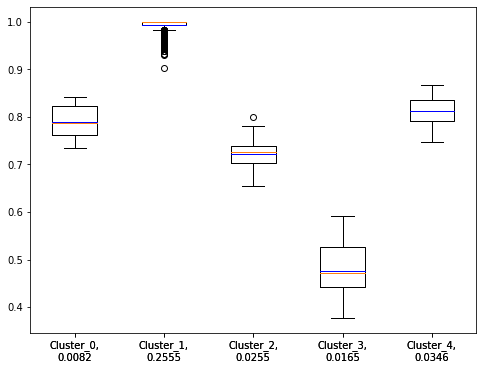

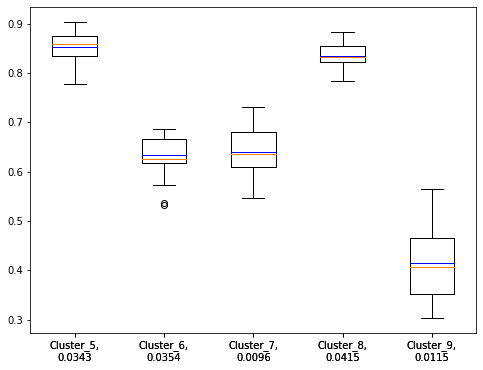

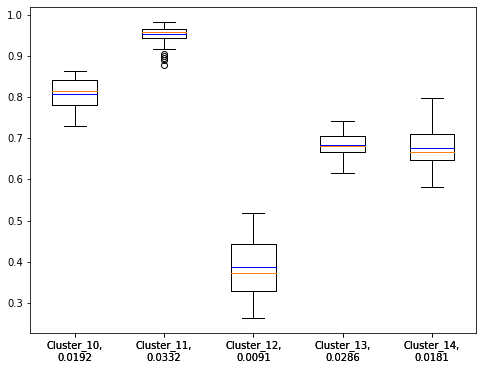

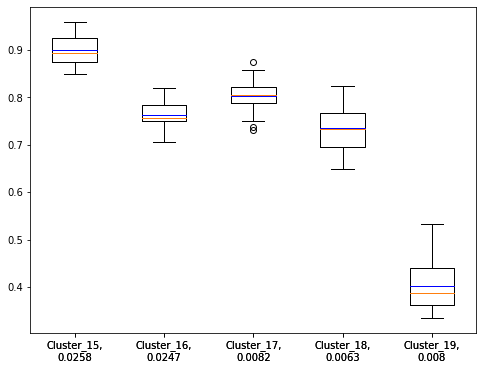

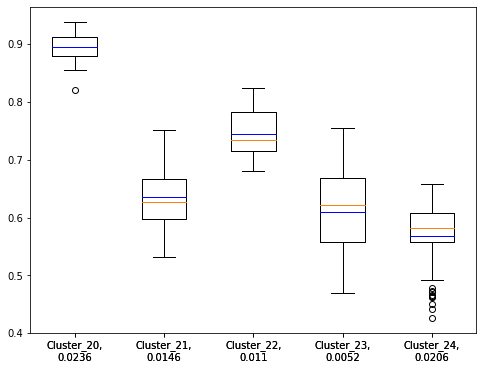

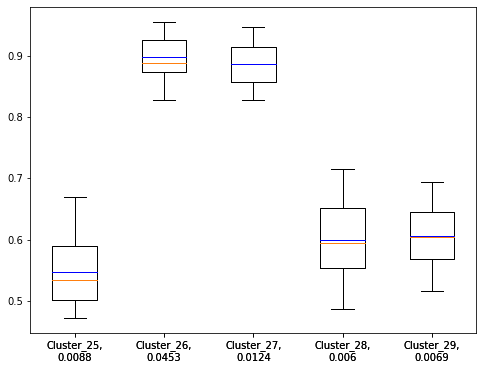

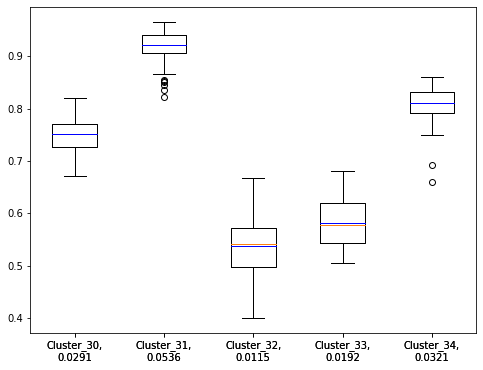

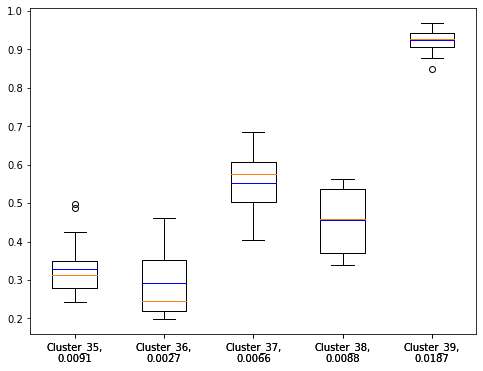

In [36]:
# make the box plot

cen_list = []
for rd in cen:
    cen_list.append(sum(rd)/(len(rd)*pmax))

length = 0
for cluster in capf_whole_list:
    length += len(cluster)

num_pts_in_clusters = []
for day,cluster in enumerate(capf_whole_list):
    num_pts_in_clusters.append(f'Cluster_{day},\n{np.round(len(cluster)/length,4)}')

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize = (16,12))

# ax1.boxplot(capf_whole_list[:5],labels = num_pts_in_clusters[:5])
# ax1.boxplot(cen_list[:5],labels = num_pts_in_clusters[:5],medianprops = {'color':'b'})
# ax2.boxplot(capf_whole_list[5:10],labels = num_pts_in_clusters[5:10])
# ax2.boxplot(cen_list[5:10],labels = num_pts_in_clusters[5:10],medianprops = {'color':'b'})
# ax3.boxplot(capf_whole_list[10:15],labels = num_pts_in_clusters[10:15])
# ax3.boxplot(cen_list[10:15],labels = num_pts_in_clusters[10:15],medianprops = {'color':'b'})
# ax4.boxplot(capf_whole_list[15:20],labels = num_pts_in_clusters[15:20])
# ax4.boxplot(cen_list[15:20],labels = num_pts_in_clusters[15:20],medianprops = {'color':'b'})
pic_num = int(num_clusters/5)
for i in range(pic_num):
    f,ax = plt.subplots(figsize = (8,6))
    ax.boxplot(capf_whole_list[i*5:(i+1)*5],labels = num_pts_in_clusters[i*5:(i+1)*5])
    ax.boxplot(cen_list[i*5:(i+1)*5],labels = num_pts_in_clusters[i*5:(i+1)*5],medianprops = {'color':'b'})
plt.show()



In [101]:
q1 = np.quantile(capf_whole_list[5], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(capf_whole_list[5], 0.75)
med = np.median(capf_whole_list[5])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

0.03732335492957739 0.9891417206572768 0.8398483009389672


In [37]:
for i,j in enumerate(capf_whole_list):
    print(np.median(j),cen_list[i])


0.787823651032864 [0.78973806]
1.0 [0.99367704]
0.7264191319248825 [0.7221179]
0.47196926885758994 [0.47658409]
0.8124662666510172 [0.8133731]
0.8581083807511737 [0.85310477]
0.625 [0.63378406]
0.6365710274178403 [0.63917067]
0.8330594197183099 [0.83372185]
0.40595412007042253 [0.41490417]
0.8152927660328638 [0.80751809]
0.957039841314554 [0.95342602]
0.37341921384976523 [0.38695059]
0.6817351711267605 [0.6830513]
0.6666666666666666 [0.67689506]
0.8948619589201878 [0.9002661]
0.7567138351330203 [0.76405196]
0.8044746819835682 [0.8035612]
0.7326963978403755 [0.73458916]
0.38725505598591553 [0.40144543]
0.8955901240610328 [0.89525265]
0.6276613136150235 [0.63493606]
0.7338958741784039 [0.74396879]
0.621685351799687 [0.60955672]
0.5828394737089202 [0.56842073]
0.5332603090766823 [0.54675787]
0.8892603244131455 [0.89781825]
0.8874465971830986 [0.88780294]
0.5938508914319249 [0.5996374]
0.6036436730046949 [0.60589445]
0.7520833333333335 [0.75158305]
0.9212954450704226 [0.92074921]
0.5413432